In [163]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [216]:
def generation(t, m, K):
    mut_mas=[] 
    coal_mas=[]
    potomki=[]
    mut=0
    while K!=1:
        v=np.piecewise(t,(t<10,10>=t>=20,t>=20),(1,2,3))
        l = K*m + K*(K-1)/(2*v)
        t_1 = t + np.random.exponential(1/l)
        s=np.random.choice(2,p=[K*m/l,(K*(K-1)/(2*v))/l])
        if s==1:#Coalescence
            potomki2=[]
            coal = np.random.choice(K,2,replace=False)
            ind1=coal[0]
            ind2=coal[1]
            coal_mas.append(coal)
            #coal_mas.append(coal)
            m_ind=min(ind1,ind2)
            s_ind=max(ind1,ind2)
            if len(potomki)==0:#если нет потомков
                for i in range(K):
                    if i < m_ind:
                        potomki.append([i])
                    if i > s_ind:
                        potomki.append([i])
                    if i == m_ind:
                        potomki.append([m_ind, s_ind])
                    if i > m_ind and i < s_ind:
                        potomki.append([i])
            else:
                for i in range(K):
                    if i < m_ind:
                        potomki2.append(potomki[i])
                    if i == m_ind:
                        potomki2.append(potomki[m_ind] + potomki[s_ind])
                    if i > m_ind and i < s_ind:
                        potomki2.append(potomki[i])
                    if i > s_ind:
                        potomki2.append(potomki[i])
                potomki = copy.deepcopy(potomki2)
            K=K-1
        else:#Mutation
            l=np.random.choice(K,replace=False)
            b = np.random.random()
            mut_mas.append(b)
            if len(potomki)!=0:
                for i in potomki[l]:
                    if i != l:
                        mut_mas.append(b)
            mut=mut+1
    #print('Число мутаций:', mut)
    ti=t_1
    return(coal_mas,mut_mas, ti)

In [210]:
c,r,ti=generation(0, 3, 2)# для числа индивидуумов равном 2 (K=2)

Число мутаций: 5


In [211]:
c#общий предок у 1-ого и 2-ого индивидуума

[array([0, 1])]

In [212]:
r

[0.6753062249241982,
 0.8590185139936115,
 0.5307874491427466,
 0.5537625249169404,
 0.8627196005043801]

In [213]:
c,r,ti=generation(0, 5, 3)# для числа индивидуумов равном 3  (K=3)

Число мутаций: 4


In [214]:
c#общий предок у 1-ого и 3-ого, 1-ого и 2-ого индивидуума

[array([0, 2]), array([1, 0])]

In [217]:
def hist(M,m,K,t):
    x_plot=[]
    y_plot=[]
    c=[]
    r=[]
    y=[]
    tm=[]
    fig,ax= plt.subplots()
    P = np.zeros(M)
    for i in range (M):
        c,r,ti=generation(t, m, K)
        t1=round(ti,3)
        if t1 not in x_plot:
            x_plot.append(t1)
            y_plot.append(1)
        else:
            y_plot[x_plot.index(t1)] += 1
        P[i] = ti
    EY = np.sum(P)/M
    DY = np.sqrt(np.sum((P-EY)**2)/(M-1))
    print('Математическое ожидание', EY)
    print('Дисперсия', DY)
    ax.bar(x_plot,np.array(y_plot)/M, width = 0.009,color='g')
    fig.set_figwidth(10)
    fig.set_figheight(3)
    ax.set_xlabel('Время')
    ax.set_ylabel('Частота')
    plt.show()

Математическое ожидание 0.999110820451
Дисперсия 1.00157843099


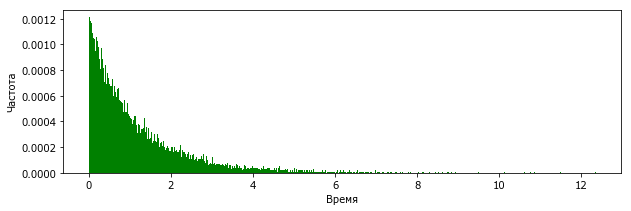

In [218]:
hist(100000,0,3,0)#частота мутаций равна 0, количество индивидуумов 3, количество хромосом 100000

Математическое ожидание 0.997649652281
Дисперсия 1.00278737127


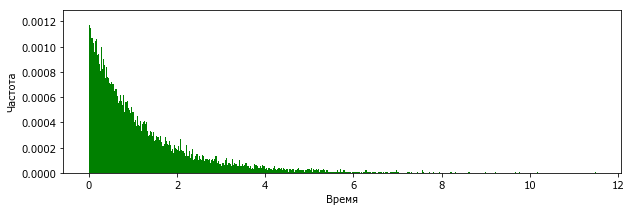

In [219]:
hist(100000,0,2,0)#частота мутаций равна 0, количество индивидуумов 2, количество хромосом 100000

Математическое ожидание 2.00075938124
Дисперсия 1.00171802716


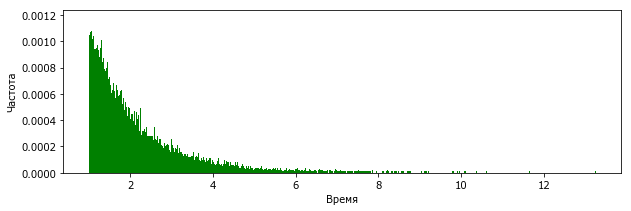

In [220]:
hist(100000,0,3,1)#частота мутаций равна 1, количество индивидуумов 3, количество хромосом 100000